The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'num_maritime_basestations': 75, 'num_ground_basestations': 75, 'num_haps_basestations': 8, 'num_leo_basestations': 7, 'num_users': 60, 'random_seed': 6, 'longitude_range': [-10, 20], 'latitude_range': [45, 65]}


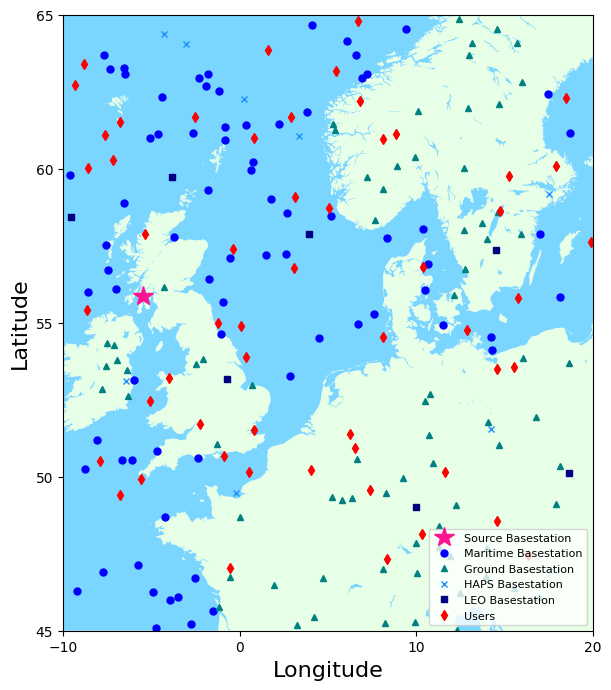

In [ ]:
%load_ext autoreload
%autoreload 2

from ssir.pathfinder import astar, genetic, bruteforce, montecarlo
import ssir.environment as env
from ssir import basestations as bs

bs.environmental_variables.SPSC_probability = 0.9999
config = env.generate_config(6)
dm = env.DataManager(**config)
pm = env.PlotManager()
graph = dm.generate_master_graph()
print(config)

A* distance throughput: 160.60798445410077
A* hop throughput: 33.216775396867895
A* spectral efficiency throughput: 57.82780647873178


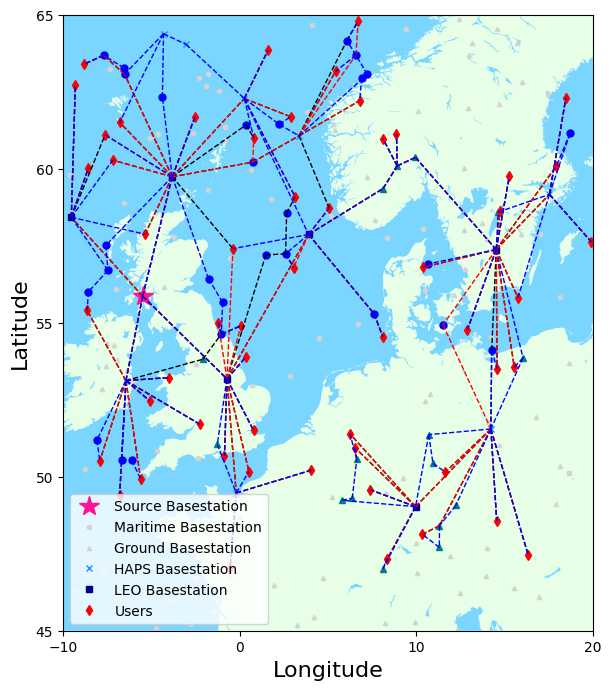

In [97]:
bs.environmental_variables.SPSC_probability = 0.99
graph_list = []
costs, predecessors = astar.a_star(graph, metric="distance")
graph_astar_distance = astar.get_solution_graph(graph, predecessors)
print(f"A* distance throughput: {graph_astar_distance.compute_network_throughput()}")
graph_list.append(graph_astar_distance)

costs, predecessors = astar.a_star(graph, metric="hop")
graph_astar_hop = astar.get_solution_graph(graph, predecessors)
print(f"A* hop throughput: {graph_astar_hop.compute_network_throughput()}")
graph_list.append(graph_astar_hop)

costs, predecessors = astar.a_star(graph, metric="spectral_efficiency")
graph_astar_spectral_efficiency = astar.get_solution_graph(graph, predecessors)
print(f"A* spectral efficiency throughput: {graph_astar_spectral_efficiency.compute_network_throughput()}")
graph_list.append(graph_astar_spectral_efficiency)

# graph_genetic, throughput_genetic = genetic.get_solution_graph(graph, verbose=True)
# print(f"Genetic throughput: {graph_genetic.compute_network_throughput()}")
# graph_list.append(graph_genetic)

# graph_montecarlo = montecarlo.get_solution_graph(graph)
# print(f"Montecarlo throughput: {graph_montecarlo.compute_network_throughput()}")
# graph_list.append(graph_montecarlo)

pm.plot_dm(dm, graph_list, verbose=False)